In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv("Binance_BTCUSDT_2024_minute.csv")
data

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
0,1732492740000,2024-11-24 23:59:00,BTCUSDT,97934.77,97942.70,97900.00,97900.04,11.34519,1.111027e+06,2054
1,1732492680000,2024-11-24 23:58:00,BTCUSDT,97852.18,97963.26,97833.65,97934.77,38.07591,3.727477e+06,3822
2,1732492620000,2024-11-24 23:57:00,BTCUSDT,97772.52,97852.18,97755.63,97852.18,14.94049,1.460820e+06,2759
3,1732492560000,2024-11-24 23:56:00,BTCUSDT,97812.01,97812.01,97765.11,97772.53,21.80201,2.132007e+06,2857
4,1732492500000,2024-11-24 23:55:00,BTCUSDT,97867.44,97907.77,97812.00,97812.01,33.54726,3.282533e+06,4824
...,...,...,...,...,...,...,...,...,...,...
473441,1704067440000,2024-01-01 00:04:00,BTCUSDT,42368.00,42397.23,42367.99,42397.23,46.05107,1.951945e+06,1415
473442,1704067380000,2024-01-01 00:03:00,BTCUSDT,42325.50,42368.00,42325.49,42367.99,30.50730,1.291997e+06,1241
473443,1704067320000,2024-01-01 00:02:00,BTCUSDT,42319.99,42331.54,42319.99,42325.50,21.60391,9.143711e+05,1019
473444,1704067260000,2024-01-01 00:01:00,BTCUSDT,42298.62,42320.00,42298.61,42320.00,21.16779,8.955809e+05,1348


Explicación exhaustiva de las columnas

    Unix:
        Representa el timestamp Unix en milisegundos. Es el número de segundos transcurridos desde el 1 de enero de 1970 (la "época Unix").
        Este valor permite identificar el momento exacto en que ocurrieron los datos.
        Puede convertirse a una fecha legible usando herramientas como Pandas.

    Date:
        Es la representación legible del timestamp Unix en formato YYYY-MM-DD HH:MM:SS.
        Por ejemplo, 2024-11-24 23:59:00 indica que los datos corresponden al minuto que finalizó a las 23:59:00 del 24 de noviembre de 2024.

    Symbol:
        Indica el par de criptomonedas al que corresponden los datos. En este caso, es BTCUSDT.
        BTC se refiere a Bitcoin, y USDT se refiere a Tether, una criptomoneda estable vinculada al dólar estadounidense.

    Open:
        Es el precio de apertura del Bitcoin al inicio del minuto.
        Representa el precio en dólares (USDT) al que se realizó la primera transacción de Bitcoin en ese intervalo de tiempo (1 minuto).

    High:
        Es el precio más alto alcanzado durante el intervalo de 1 minuto.
        Representa la transacción con el precio más alto durante ese minuto.

    Low:
        Es el precio más bajo alcanzado durante el intervalo de 1 minuto.
        Representa la transacción con el precio más bajo durante ese minuto.

    Close:
        Es el precio de cierre del Bitcoin al final del minuto.
        Representa el precio en dólares (USDT) al que se realizó la última transacción de Bitcoin durante ese intervalo de tiempo.

    Volume BTC:
        Representa el volumen total de Bitcoin negociado durante ese minuto.
        Es la suma de las cantidades de Bitcoin transaccionadas en ese intervalo.

    Volume USDT:
        Representa el volumen total en USDT (dólares) negociado durante ese minuto.
        Es el equivalente en dólares del volumen de Bitcoin transaccionado.

    tradecount:
        Representa el número total de transacciones realizadas durante ese minuto.
        Cada transacción corresponde a una orden completada (una compra o venta) en la plataforma Binance.

In [2]:
# Resumen general de las columnas, tipos de datos y valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473446 entries, 0 to 473445
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unix         473446 non-null  int64  
 1   Date         473446 non-null  object 
 2   Symbol       473446 non-null  object 
 3   Open         473446 non-null  float64
 4   High         473446 non-null  float64
 5   Low          473446 non-null  float64
 6   Close        473446 non-null  float64
 7   Volume BTC   473446 non-null  float64
 8   Volume USDT  473446 non-null  float64
 9   tradecount   473446 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 36.1+ MB


In [3]:
# Obtener los valores únicos en la columna Symbol
unique_symbols = data['Symbol'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'Symbol':", unique_symbols)


Valores únicos en la columna 'Symbol': ['BTCUSDT']


In [4]:
# Estadísticas descriptivas de las columnas numéricas
data.describe()

,Unix,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
count,4.734460e+05,473446.000000,473446.000000,473446.000000,473446.000000,473446.000000,4.734460e+05,473446.000000
mean,1.718271e+12,62278.483176,62301.493686,62255.132655,62278.601961,24.671558,1.536193e+06,1679.660367
std,8.200820e+09,10482.196473,10486.834704,10477.545112,10482.290979,39.729407,2.481339e+06,2204.164459
min,1.704067e+12,38558.920000,38578.610000,38555.000000,38558.920000,0.078720,5.071142e+03,58.000000
25%,1.711169e+12,58128.002500,58149.990000,58106.762500,58128.010000,6.622770,4.021931e+05,551.000000
50%,1.718271e+12,63380.150000,63406.000000,63356.225000,63380.160000,13.541290,8.217986e+05,975.000000
75%,1.725372e+12,67643.477500,67663.040000,67621.230000,67643.480000,27.615172,1.705206e+06,1865.000000
max,1.732493e+12,99547.210000,99588.010000,99497.100000,99547.200000,1629.309190,1.171061e+08,67869.000000


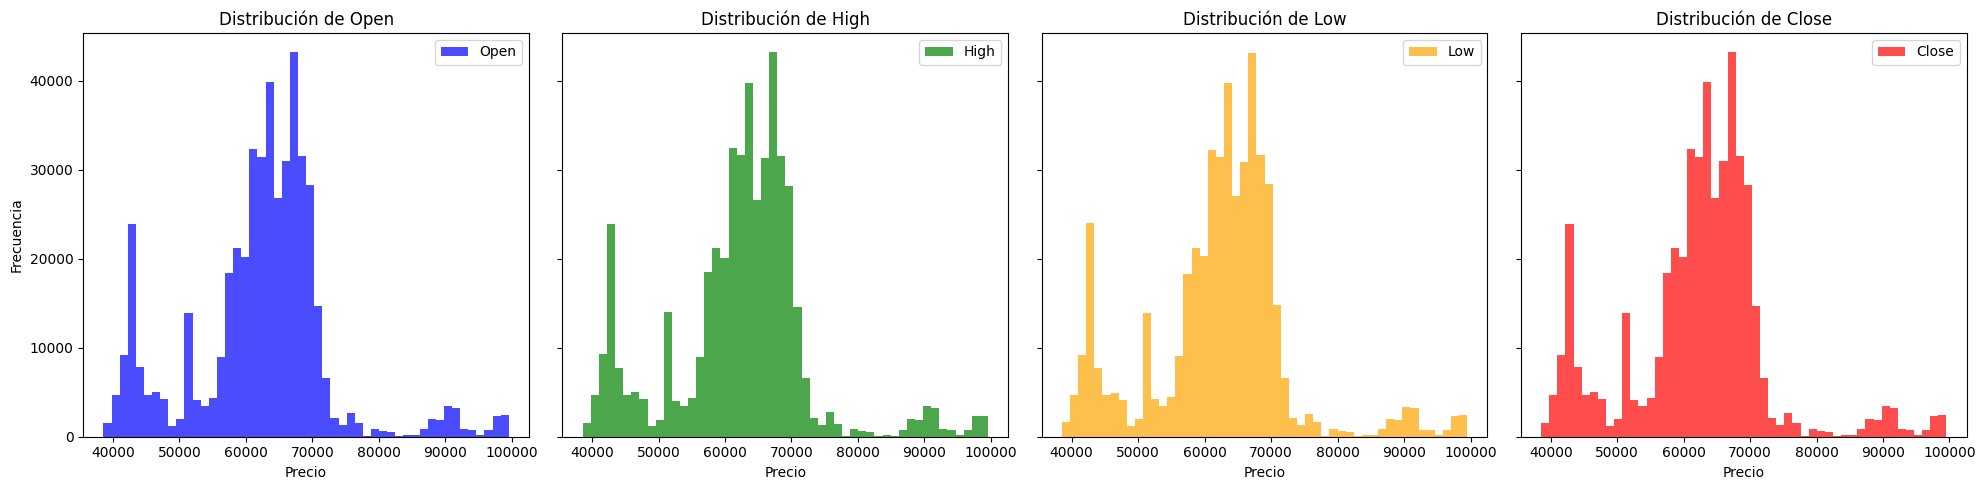

In [5]:
# Crear una figura con 4 subplots en una fila
fig, axes = plt.subplots(1, 4, figsize = (20, 5), sharey = True)

# Nombres de las columnas y colores asociados
columns = ['Open', 'High', 'Low', 'Close']
colors = ['blue', 'green', 'orange', 'red']

# Iterar sobre las columnas, los colores y los subplots
for col, color, ax in zip(columns, colors, axes):
    data[col].plot.hist(bins = 50, alpha = 0.7, ax = ax, color = color, label = col)
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel("Precio")
    ax.set_ylabel("Frecuencia")
    ax.legend()  # Agregar una leyenda para cada gráfico

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


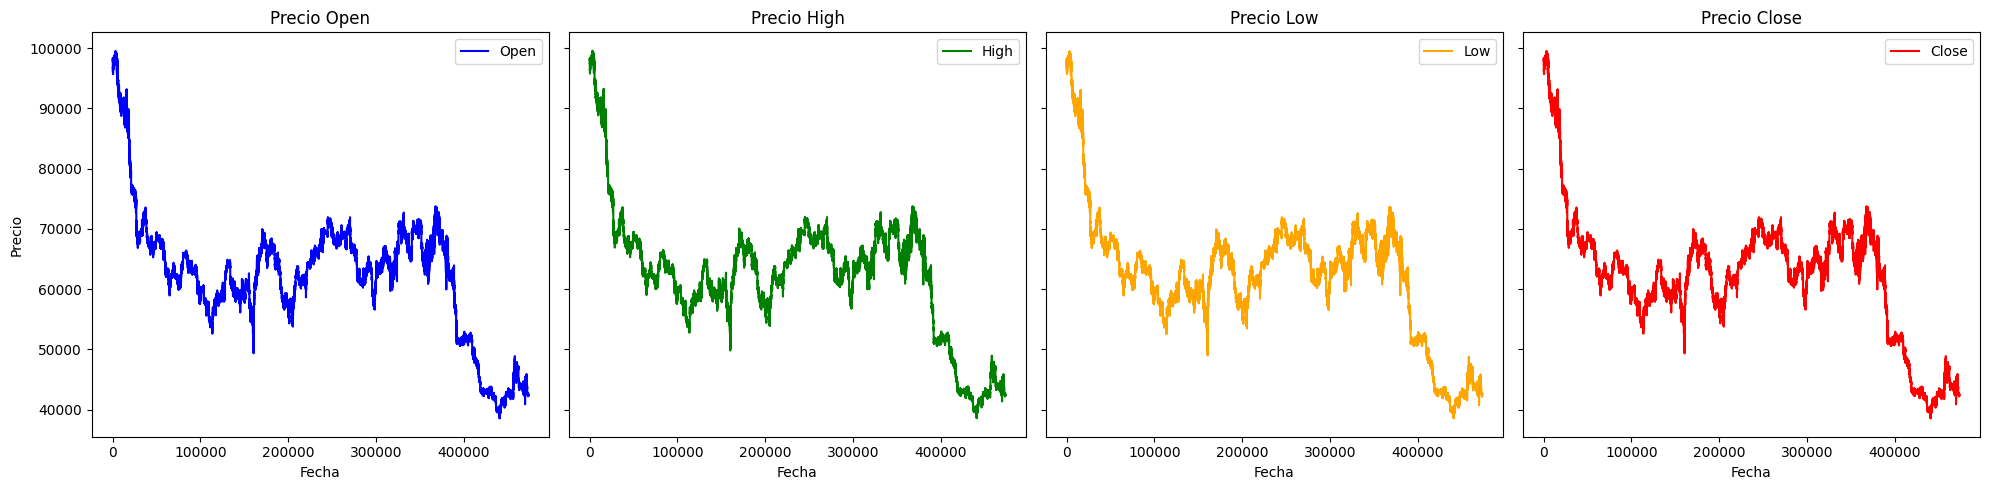

In [6]:
# Crear una figura con 4 subplots en una fila
fig, axes = plt.subplots(1, 4, figsize = (20, 5), sharey = True)

# Nombres de las columnas y colores asociados
columns = ['Open', 'High', 'Low', 'Close']
colors = ['blue', 'green', 'orange', 'red']

# Iterar sobre las columnas, los colores y los subplots
for col, color, ax in zip(columns, colors, axes):
    data.plot(y = col, ax = ax, color = color, legend = False)
    ax.set_title(f"Precio {col}")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Precio")
    ax.legend([col])  # Agregar una leyenda para cada gráfico

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


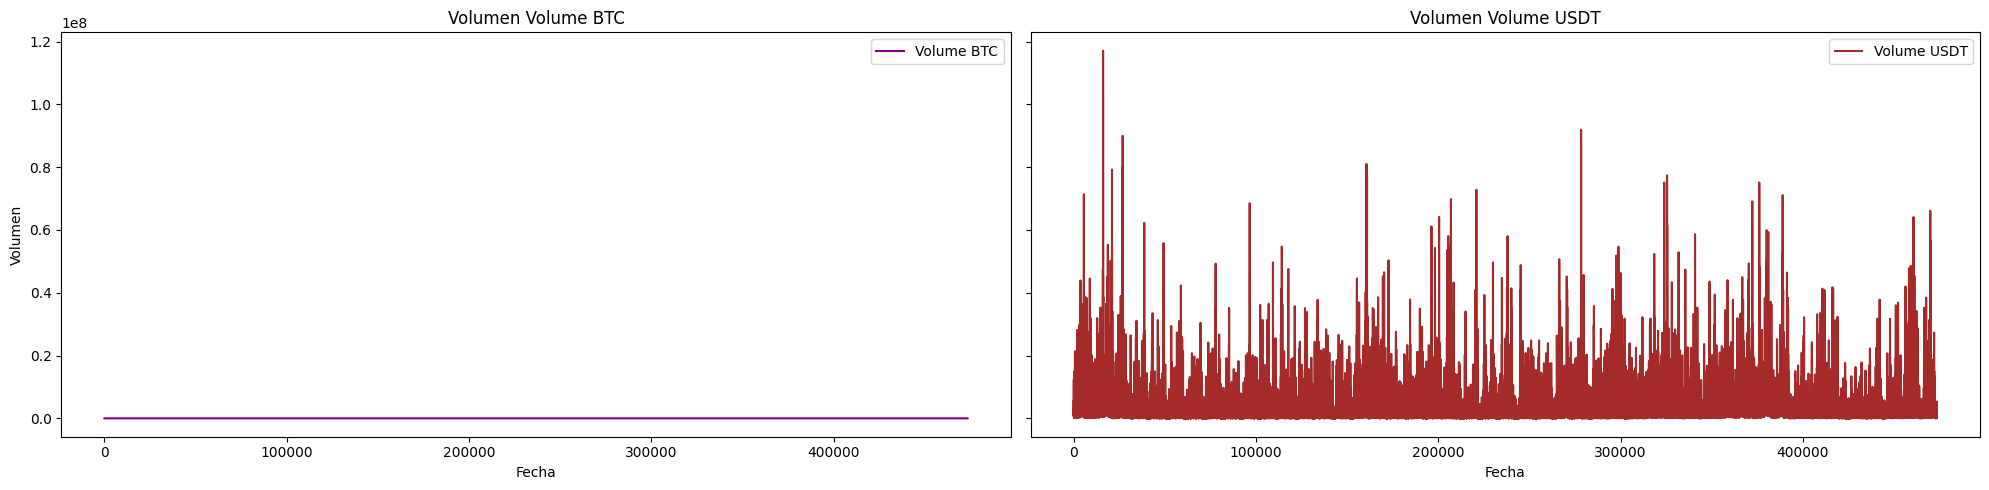

In [7]:
# Crear una figura con 2 subplots en una fila
fig, axes = plt.subplots(1, 2, figsize = (20, 5), sharey = True)

# Nombres de las columnas de volumen y colores asociados
columns = ['Volume BTC', 'Volume USDT']
colors = ['purple', 'brown']

# Iterar sobre las columnas, los colores y los subplots
for col, color, ax in zip(columns, colors, axes):
    data.plot(y = col, ax = ax, color = color, legend = False)
    ax.set_title(f"Volumen {col}")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Volumen")
    ax.legend([col])  # Agregar una leyenda para cada gráfico

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


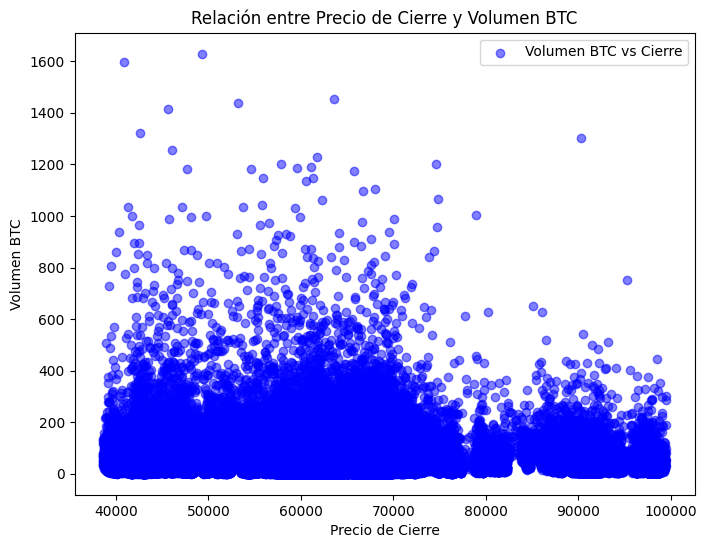

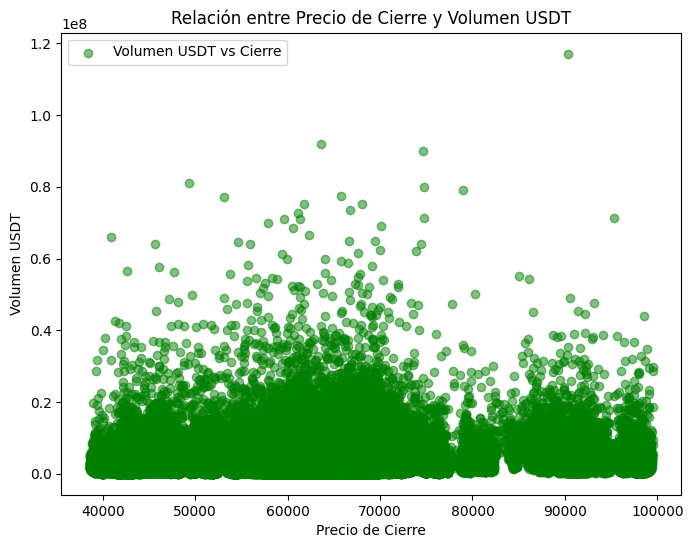

In [8]:
# Gráfica de dispersión entre el precio de cierre y el volumen negociado (BTC)
plt.figure(figsize = (8, 6))
plt.scatter(data['Close'], data['Volume BTC'], alpha = 0.5, color = 'blue', label = "Volumen BTC vs Cierre")
plt.title("Relación entre Precio de Cierre y Volumen BTC")
plt.xlabel("Precio de Cierre")
plt.ylabel("Volumen BTC")
plt.legend()
plt.show()

# Gráfica de dispersión entre el precio de cierre y el volumen negociado (USDT)
plt.figure(figsize = (8, 6))
plt.scatter(data['Close'], data['Volume USDT'], alpha = 0.5, color = 'green', label = "Volumen USDT vs Cierre")
plt.title("Relación entre Precio de Cierre y Volumen USDT")
plt.xlabel("Precio de Cierre")
plt.ylabel("Volumen USDT")
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

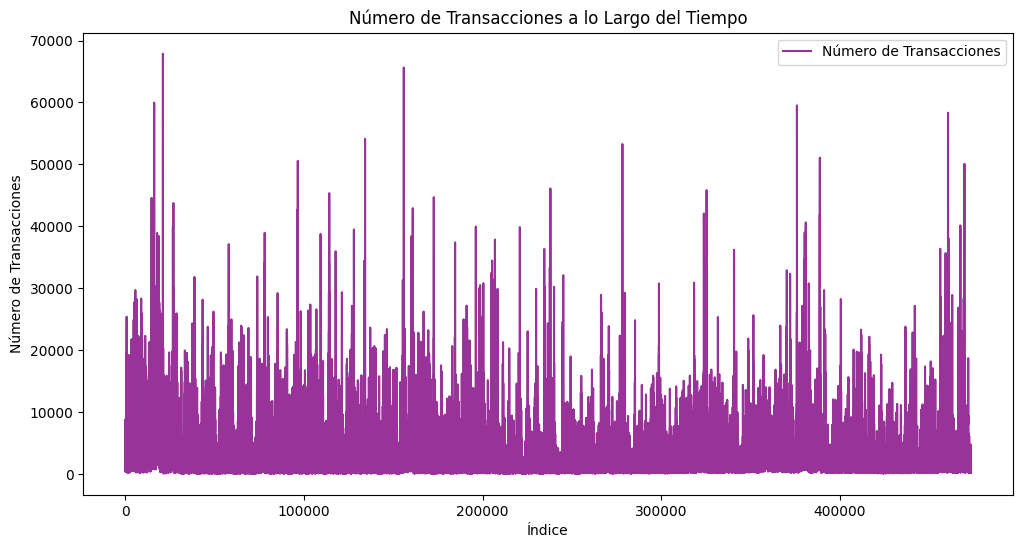

In [9]:
# Gráfico del número de transacciones a lo largo del tiempo
plt.figure(figsize = (12, 6))
data.plot(y = 'tradecount', figsize = (12, 6), alpha = 0.8, legend = False, color = 'purple')
plt.title("Número de Transacciones a lo Largo del Tiempo")
plt.xlabel("Índice")
plt.ylabel("Número de Transacciones")
plt.legend(["Número de Transacciones"])
plt.show()


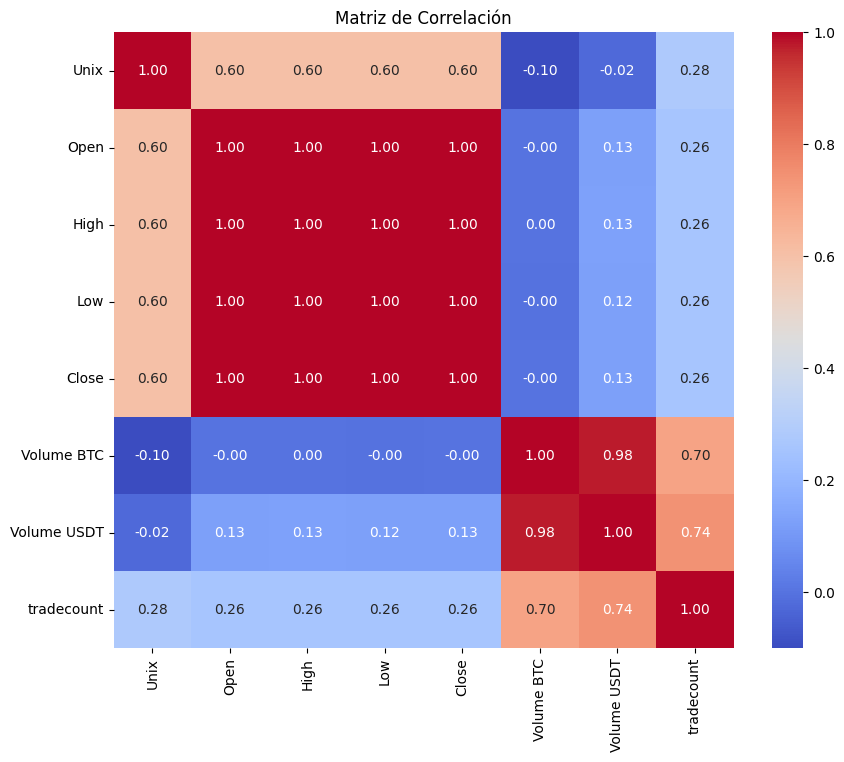

In [10]:
# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include = ['number'])

# Calcular la matriz de correlación
correlation = numeric_data.corr()

# Visualizar la matriz de correlación como un heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(correlation, annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title("Matriz de Correlación")
plt.show()